# Software Architectural Styles Analysis
The architectural style is a very specific solution to a particular software, which typically focuses on how to organize the code created for the software. It focuses on creating the layers and modules of the software and allowing an appropriate interaction between the various modules for giving the right results upon implementation

<img src='https://www.tutorialspoint.com/software_architecture_design/images/software_design.jpg'>

<a href='https://www.kaggle.com/qadeemkhan/dataset-of-software-architectural-styles'> Link to Dataset </a>

## Load Data

In [92]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [93]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
# read dataset stored in csv format
df = pd.read_csv('/content/gdrive/MyDrive/Projects/Software-Architectural-Styles-Analysis/Data Set Aquisition (3).csv')
df

,Timestamp,Your Good Name?,Organization?,Last Degree?,Job Experience ?,1. How Many Repository Architectural Styles have you used for a particular project?,2. How Many Client Server Styles you have used for a particular project?,3. How Many Abstract Machine Styles you have used for a particular project?,4. How Many Object Oriented Styles you have used for a particular project?,5. How Many Function Oriented Styles you have used for a particular project?,6. How Many Event Driven Styles you have used for a particular project?,7. How Many Layered Styles you have used for a particular project?,8. How Many Pipes & Filters Architectural Styles have you used for a particular project?,9. How Many Data centeric Architectural Styles have you used for a particular project?,10. How Many Blackboard Architectural Styles have you used for a particular project?,11. How Many Rule Based Architectural Styles have you used for a particular project?,12. How Many Publish Subscribe Architectural Styles have you used for a particular project?,13. How Many Asynchronous Messaging Architectural Styles have you used for a particular project?,14. How Many Plug-ins Architectural Styles have you used for a particular project?,15. How Many Micro-kernel Architectural Styles have you used for a particular project?,16. How Many Peer-to-Peer Architectural Styles have you used for a particular project?,17. How Many Domain Driven Architectural Styles have you used for a particular project?,18. How Many Shared Nothing Architectural Styles have you used for a particular project?
0,2016/12/11 8:42:47 AM GMT+5,Muhammad Adil,kohat University of Science and Technology,BSC (CS or SE),Other,3,4,2,1455,2342,1000,859,456,232,965,2045,543,2955,1004,356,289,2006,1594
1,2016/12/11 8:47:34 AM GMT+5,Muhammad Saqlain,NUST,MS(CS or SE),Education,5,3,2,50,20,20,10,20,5,10,50,10,10,0,0,10,10,20
2,2016/12/11 8:48:59 AM GMT+5,Fazlul Haq,Govt,BSC (CS or SE),Other,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2016/12/11 8:53:11 AM GMT+5,Zamir,Daewoo E&C,BSC (CS or SE),Other,2,3,2,1000,1500,1700,500,600,600,500,1500,400,1600,1400,300,500,600,1450
4,2016/12/11 9:01:31 AM GMT+5,Kaleem ullah khan,AIIT,MS(CS or SE),Education,2,1,1,2,1,0,3,0,1,4,3,1,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2017/03/27 4:11:25 PM GMT+5,Jani,UoP,MS(CS or SE),Software Industry;Education,9,6,8,2560,2510,2563,256,251,251,256,251,256,251,253,253,251,253,251
998,2017/03/27 4:13:55 PM GMT+5,Sana,KUST,BSC (CS or SE),Software Industry;Education,6,5,6,563,651,365,364,325,845,256,362,310,362,125,365,256,362,362
999,2017/03/27 4:14:49 PM GMT+5,Hadia Hina,KUST,BSC (CS or SE),Software Industry;Education,5,6,3,662,362,251,256,251,251,256,362,362,362,321,321,362,362,362
1000,2017/03/27 4:15:48 PM GMT+5,Sadia Jalil,KUST,BSC (CS or SE),Software Industry;Education,8,9,6,523,652,365,362,364,362,362,364,362,251,253,362,365,210,253


For starters, the data contains general information about the people who were targeted in this survey e.g. name and time. Then, it contains the important data which are the answeres of the questions that were asked during the survey. The answeres were just numbers which will make the analysis much easier.

Let's drop the first few general information rows to make things easier during the EDA

In [95]:
df.drop('Timestamp', axis = 1, inplace = True)
df.drop('Your Good Name?', axis = 1, inplace = True)
df.drop('Organization?', axis = 1, inplace = True)
df.drop('Last Degree?', axis = 1, inplace = True)
df.drop('Job Experience ?', axis = 1, inplace = True)

In [96]:
df

,1. How Many Repository Architectural Styles have you used for a particular project?,2. How Many Client Server Styles you have used for a particular project?,3. How Many Abstract Machine Styles you have used for a particular project?,4. How Many Object Oriented Styles you have used for a particular project?,5. How Many Function Oriented Styles you have used for a particular project?,6. How Many Event Driven Styles you have used for a particular project?,7. How Many Layered Styles you have used for a particular project?,8. How Many Pipes & Filters Architectural Styles have you used for a particular project?,9. How Many Data centeric Architectural Styles have you used for a particular project?,10. How Many Blackboard Architectural Styles have you used for a particular project?,11. How Many Rule Based Architectural Styles have you used for a particular project?,12. How Many Publish Subscribe Architectural Styles have you used for a particular project?,13. How Many Asynchronous Messaging Architectural Styles have you used for a particular project?,14. How Many Plug-ins Architectural Styles have you used for a particular project?,15. How Many Micro-kernel Architectural Styles have you used for a particular project?,16. How Many Peer-to-Peer Architectural Styles have you used for a particular project?,17. How Many Domain Driven Architectural Styles have you used for a particular project?,18. How Many Shared Nothing Architectural Styles have you used for a particular project?
0,3,4,2,1455,2342,1000,859,456,232,965,2045,543,2955,1004,356,289,2006,1594
1,5,3,2,50,20,20,10,20,5,10,50,10,10,0,0,10,10,20
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,3,2,1000,1500,1700,500,600,600,500,1500,400,1600,1400,300,500,600,1450
4,2,1,1,2,1,0,3,0,1,4,3,1,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,9,6,8,2560,2510,2563,256,251,251,256,251,256,251,253,253,251,253,251
998,6,5,6,563,651,365,364,325,845,256,362,310,362,125,365,256,362,362
999,5,6,3,662,362,251,256,251,251,256,362,362,362,321,321,362,362,362
1000,8,9,6,523,652,365,362,364,362,362,364,362,251,253,362,365,210,253


In order to make the analysis much easier and understandable, we would like to modify the columns names and make them shorter.
There are different ways to do that, we will be using `set_axis` to change the headers.

In [97]:
df = df.set_axis([
                  'no. repo', 
                  'client-server', 
                  'abstract-machine', 
                  'object-oriented', 
                  'function-oriented', 
                  'event-drive', 
                  'layered', 
                  'pipes-filters',
                  'data-centeric', 
                  'blackboard', 
                  'rule-based',
                  'publish-susbcribe',
                  'asynchronous-messaging',
                  'plug-ins',
                  'micro-kernel',
                  'peer-to-peer',
                  'domain-driven',
                  'shared-nothing'
                  ],
                  axis=1, inplace=False)
df

,no. repo,client-server,abstract-machine,object-oriented,function-oriented,event-drive,layered,pipes-filters,data-centeric,blackboard,rule-based,publish-susbcribe,asynchronous-messaging,plug-ins,micro-kernel,peer-to-peer,domain-driven,shared-nothing
0,3,4,2,1455,2342,1000,859,456,232,965,2045,543,2955,1004,356,289,2006,1594
1,5,3,2,50,20,20,10,20,5,10,50,10,10,0,0,10,10,20
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,3,2,1000,1500,1700,500,600,600,500,1500,400,1600,1400,300,500,600,1450
4,2,1,1,2,1,0,3,0,1,4,3,1,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,9,6,8,2560,2510,2563,256,251,251,256,251,256,251,253,253,251,253,251
998,6,5,6,563,651,365,364,325,845,256,362,310,362,125,365,256,362,362
999,5,6,3,662,362,251,256,251,251,256,362,362,362,321,321,362,362,362
1000,8,9,6,523,652,365,362,364,362,362,364,362,251,253,362,365,210,253


In [98]:
# Checking the missing values
df.isnull().sum()

no. repo                  0
client-server             0
abstract-machine          0
object-oriented           0
function-oriented         0
event-drive               0
layered                   0
pipes-filters             0
data-centeric             0
blackboard                0
rule-based                0
publish-susbcribe         0
asynchronous-messaging    0
plug-ins                  0
micro-kernel              0
peer-to-peer              0
domain-driven             0
shared-nothing            0
dtype: int64

Now the data is ready for analysis

## Exploratory Data Analysis

In [99]:
df.describe()

,no. repo,client-server,abstract-machine,object-oriented,function-oriented,event-drive,layered,pipes-filters,data-centeric,blackboard,rule-based,publish-susbcribe,asynchronous-messaging,plug-ins,micro-kernel,peer-to-peer,domain-driven,shared-nothing
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,4.999002,5.314371,5.309381,780.035928,819.645709,852.023952,360.514970,369.330339,367.035928,378.896208,840.556886,351.869261,847.144711,839.436128,367.959082,364.616766,821.855289,876.586826
std,2.546863,2.450707,2.513916,952.163855,954.150207,947.890602,346.485368,343.810186,345.399973,348.601879,955.421099,334.521138,974.739263,955.309847,344.535013,345.012952,958.619493,995.950242
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,3.000000,3.000000,7.000000,9.000000,20.000000,23.000000,22.000000,21.250000,23.250000,33.000000,23.000000,32.000000,32.250000,29.250000,33.000000,30.000000,30.000000
50%,5.000000,5.000000,5.000000,350.500000,456.000000,555.000000,235.000000,272.000000,258.000000,300.000000,500.000000,252.000000,456.000000,500.000000,256.000000,256.000000,456.000000,500.000000
75%,7.000000,7.000000,7.000000,1253.250000,1343.500000,1500.000000,666.750000,677.000000,670.750000,678.000000,1282.000000,635.250000,1400.000000,1400.000000,677.000000,668.500000,1249.250000,1494.500000
max,10.000000,10.000000,10.000000,3000.000000,3000.000000,3000.000000,1000.000000,1000.000000,1000.000000,1000.000000,3000.000000,1000.000000,3000.000000,3000.000000,1000.000000,1000.000000,3000.000000,3000.000000


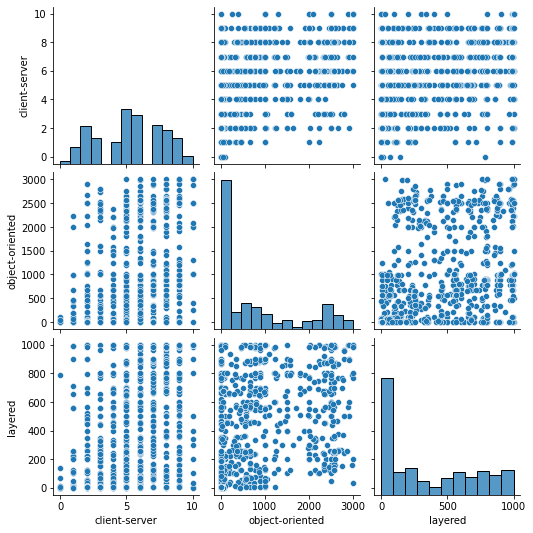

In [100]:
# plot the most known styles.
sns.pairplot(data = df, vars=['client-server','object-oriented','layered'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea8c451750>,
      dtype=object)

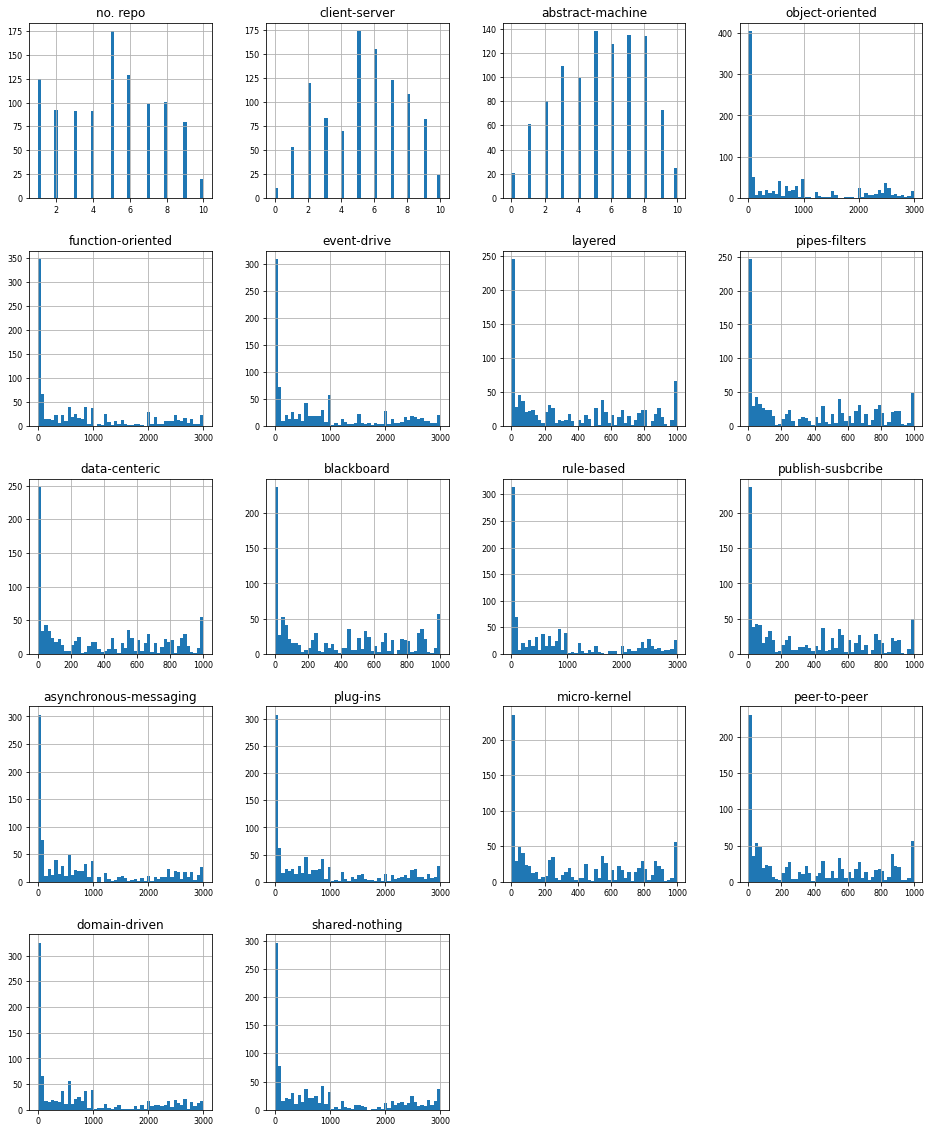

In [101]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [102]:
# finding sum over index axis
# By default the axis is set to 0
counts = df.sum(axis = 0, skipna = True)
counts

no. repo                    5009
client-server               5325
abstract-machine            5320
object-oriented           781596
function-oriented         821285
event-drive               853728
layered                   361236
pipes-filters             370069
data-centeric             367770
blackboard                379654
rule-based                842238
publish-susbcribe         352573
asynchronous-messaging    848839
plug-ins                  841115
micro-kernel              368695
peer-to-peer              365346
domain-driven             823499
shared-nothing            878340
dtype: int64

In [112]:
# convert the counts and styles to a df
uses_df = pd.DataFrame(counts, columns = ['uses'])

uses_df

,uses
no. repo,5009
client-server,5325
abstract-machine,5320
object-oriented,781596
function-oriented,821285
event-drive,853728
layered,361236
pipes-filters,370069
data-centeric,367770
blackboard,379654


In [114]:
# drop the number of repos as we dont need it
uses_df = uses_df.drop('no. repo')

In [113]:
# find the most used style
uses_df.iloc[uses_df['uses'].argmax()]

uses    878340
Name: shared-nothing, dtype: int64

The most used style was **shared-nothing** style with **878340** number of uses

<img src = 'https://www.researchgate.net/profile/Norbert-Podhorszki/publication/3730082/figure/fig1/AS:669070349307923@1536530210654/Shared-nothing-architecture.png' >

A shared-nothing architecture (SN) is a distributed computing architecture in which each update request is satisfied by a single node (processor/memory/storage unit) in a computer cluster.

In [115]:
# find the minimum used style
uses_df.iloc[uses_df['uses'].argmin()]

uses    5320
Name: abstract-machine, dtype: int64

The least used style was **abstract-machine** style with **5320** number of uses

<img src = 'https://www.researchgate.net/profile/Wenguang-Chen-2/publication/237587383/figure/fig1/AS:669388030083072@1536605951250/The-OFC-abstract-machine-architecture-model.png' >

Abstract machine model is designed to allow application developers to focus on the aspects of the machine that are important or relevant to performance and code structure. These models are intended as communication aids between application developers and hardware architects during the co-design process.

In [136]:
# convert the DF to a dictionary
uses_dict = uses_df.to_dict()
uses_dict

{'uses': {'abstract-machine': 5320,
  'asynchronous-messaging': 848839,
  'blackboard': 379654,
  'client-server': 5325,
  'data-centeric': 367770,
  'domain-driven': 823499,
  'event-drive': 853728,
  'function-oriented': 821285,
  'layered': 361236,
  'micro-kernel': 368695,
  'object-oriented': 781596,
  'peer-to-peer': 365346,
  'pipes-filters': 370069,
  'plug-ins': 841115,
  'publish-susbcribe': 352573,
  'rule-based': 842238,
  'shared-nothing': 878340}}

In [138]:
uses_dict = uses_dict.pop('uses')

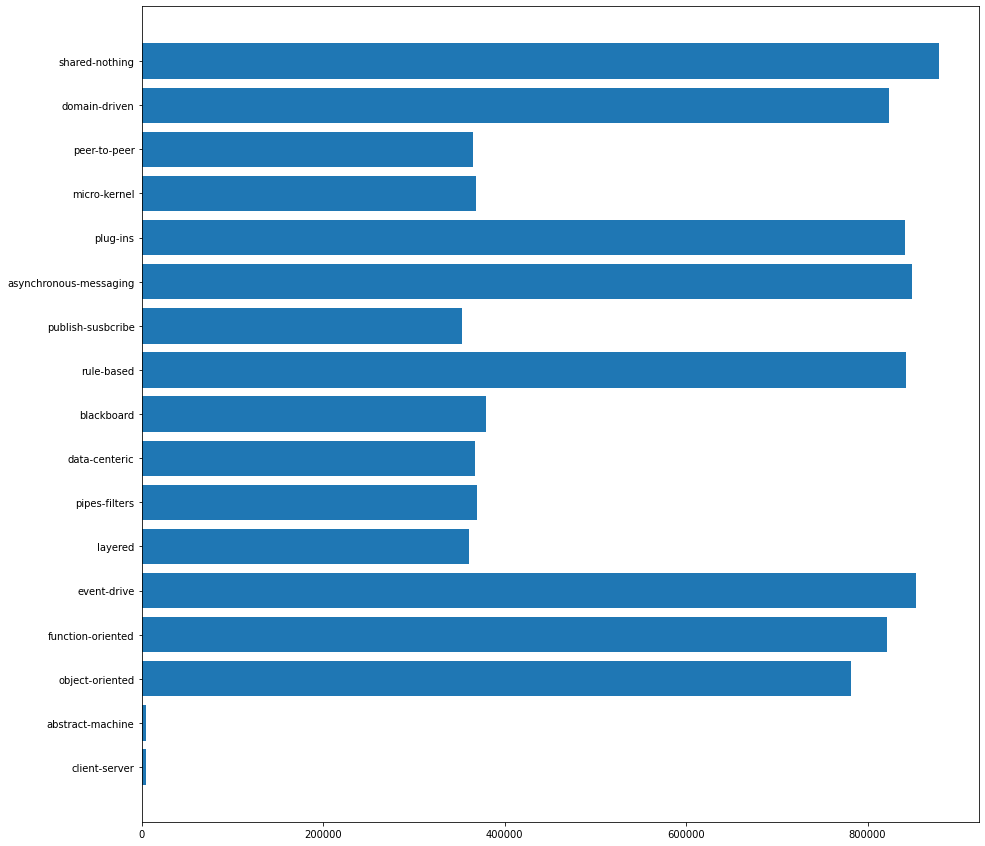

In [150]:
ind = np.arange(len(uses_dict))

plt.figure(figsize=(15,15))
plt.barh(ind, list(uses_dict.values()))
plt.yticks(ind, list(uses_dict.keys()))
plt.show()

## Final Words:
The Software Architecture field is a very huge field that can't be judged based on such a small dataset like the one analyzed above. However, we got a breif overview of the well-known stlyes based on the survey done. But, we can't say that the above analysis can be taken for granted since the analysis was made on a ver small sample of people compared to the real number of Software Engineers who are specialized in the Software Architecture field.